### Introduction to Machine Learning in Finance and Insurance (Spring 2024)
# Project 1 - Credit Analytics - Sandbox

In [1]:
# Import basic libraries
import numpy as np
import matplotlib.pyplot as plt

# Implement a logistic regression model

In [2]:
# Import libraries
from sklearn.datasets import make_classification # toy dataset
from sklearn.linear_model import LogisticRegression # logistic regression model
from sklearn.metrics import log_loss # cross-entropy

In [3]:
# Fix random seed for reproducibility
np.random.seed(20)

# Generate a toy dataset for binary classification (labels: 0 and 1)
n_samples = 50000
X, y = make_classification(n_samples=n_samples,
                           n_features=2,
                           n_informative=2,
                           n_redundant=0,
                           n_classes=2,
                           n_clusters_per_class=1,
                           weights=[0.95, 0.05])

# Train-test split
m = int(0.8*n_samples) # number of samples in training set
n = n_samples - m # number of samples in test set

X_train = X[:m, :]
y_train = y[:m]

X_test = X[m:, :]
y_test = y[m:]

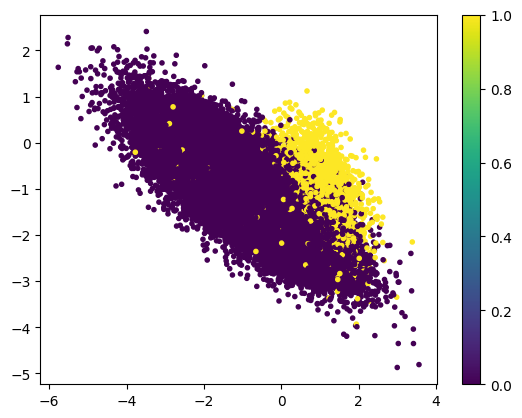

In [4]:
# Since this is a two-dimensional dataset, we can plot it!
# Yellow points have label 1 and blue points have label 0
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.colorbar()
plt.show()

In [5]:
# Implement and train a logistic regression model
# Attetion! Set the argument panalty=None to perform a logistic regression *without* regularization
logistic_regression = LogisticRegression(penalty=None).fit(X, y)

# Look at the parameters of the fitted model
print('Coefficients:', logistic_regression.coef_)
print('Intercept:', logistic_regression.intercept_)

Coefficients: [[3.06293069 2.90940982]]
Intercept: [0.32758918]


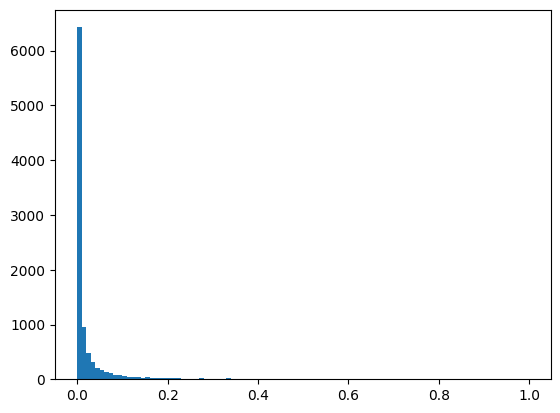

In [6]:
# Predict probabilities of class one (i.e. yellow point) for each point in the test data set
prob_pred_one = logistic_regression.predict_proba(X_test)[:, 1]

# Plot the histogram of the probabilities
plt.hist(prob_pred_one, bins=100)
plt.show()

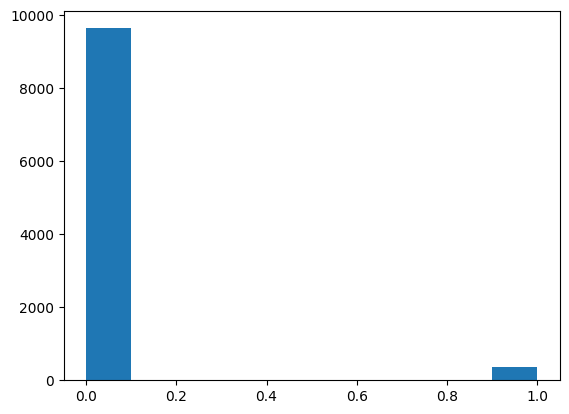

Frequency of yellow points: 3.63%


In [7]:
# Predict label for each point in the test data set
# By deafult sklearn implements a threshold of 0.5
y_pred = logistic_regression.predict(X_test)

plt.hist(y_pred)
plt.show()

print(f'Frequency of yellow points: {100*np.mean(y_pred):.2f}%')

In [8]:
# Compute the cross-entropy on the train and test data sets

print(f'Cross-entropy (train): {log_loss(y_train, logistic_regression.predict_proba(X_train)[:, 1]):.4f}')
print(f'Cross-entropy (test): {log_loss(y_test, logistic_regression.predict_proba(X_test)[:, 1]):.4f}')

Cross-entropy (train): 0.0979
Cross-entropy (test): 0.1009


# Implement a neural network using Keras

In [9]:
import keras

In [10]:
# Implement the network
# Two hidden layers with 20 neurons each with ReLU activativation function
# Output layer with sigmoid activation function (needed to output probabilities!)
neural_network = keras.Sequential([keras.layers.Dense(20, activation='relu'),
                                   keras.layers.Dense(20, activation='relu'),
                                   keras.layers.Dense(1, activation='sigmoid')])

# Compile the network
# We choose Adam as gradient descent algorithm and cross-entropy as loss function
lr = 0.001 # learning rate
neural_network.compile(optimizer=keras.optimizers.Adam(learning_rate=lr),
                       loss=keras.losses.BinaryCrossentropy())

In [11]:
# Train the model
batch_size = 1024 # size of batches in stochastic gradient descent
epochs = 50 # number of iterations on dataset
history = neural_network.fit(x=X_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.6817
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4047
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2405
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1542
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1165
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1026
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1016
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0982
Epoch 9/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0976
Epoch 10/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0928
Epoch 11/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0934
Epoch 12/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0899
Epoch 13/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0949
Epoch 14/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0934
Epoch 15/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0943
Epoch 16/50
40/40 ━

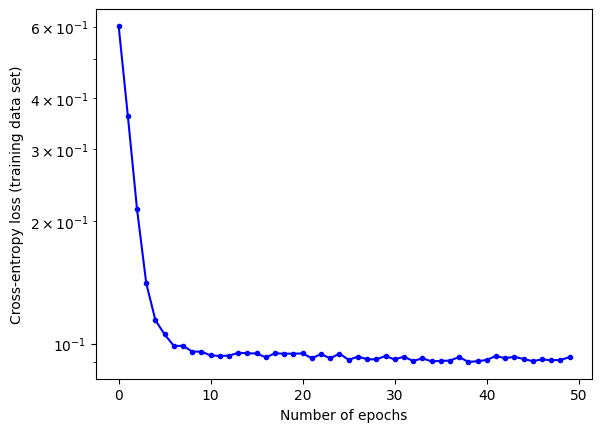

In [12]:
# Plot the cross-entropy loss during training

plt.plot(history.history['loss'], 'b.-')
plt.ylabel('Cross-entropy loss (training data set)')
plt.xlabel('Number of epochs')
plt.yscale('log')
plt.show()

In [13]:
# Compute the cross-entropy on the train and test data sets

print(f'Cross-entropy (train): {log_loss(y_train, neural_network.predict(X_train)):.4f}')
print(f'Cross-entropy (test): {log_loss(y_test, neural_network.predict(X_test)):.4f}')

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Cross-entropy (train): 0.0915
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Cross-entropy (test): 0.0940


# Plotting ROC curves and computing AUC

In [14]:
from sklearn.metrics import roc_auc_score, roc_curve

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


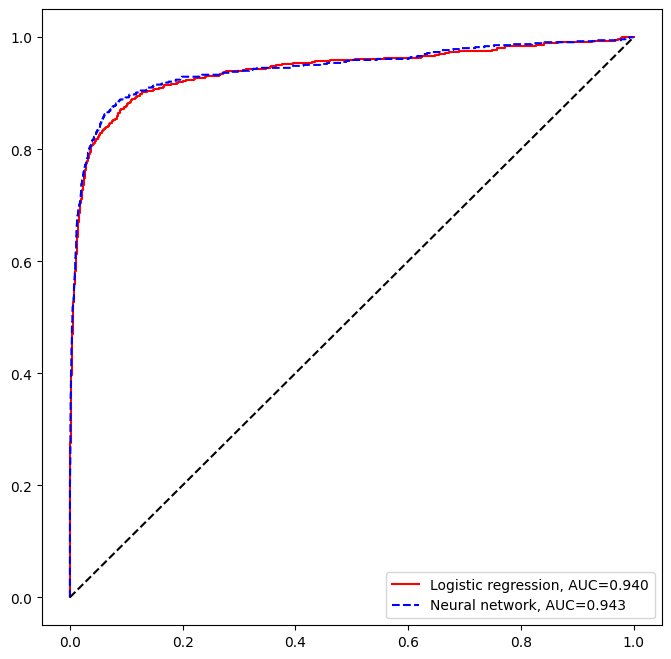

In [15]:
# Compute FPR and TPR for logistic regression
fpr_LR, tpr_LR, thresholds_LR = roc_curve(y_test, logistic_regression.predict_proba(X_test)[:, 1], pos_label=1)
auc_LR = roc_auc_score(y_test, logistic_regression.predict_proba(X_test)[:, 1])

# Compute FPR and TPR for neural network
fpr_NN, tpr_NN, thresholds_NN = roc_curve(y_test, neural_network.predict(X_test), pos_label=1)
auc_NN = roc_auc_score(y_test, neural_network.predict(X_test))

# Create plot
plt.figure(figsize= [8, 8])
plt.plot(fpr_LR, tpr_LR, 'r-', label='Logistic regression, AUC={:.3f}'.format(auc_LR))
plt.plot(fpr_NN, tpr_NN, 'b--', label='Neural network, AUC={:.3f}'.format(auc_NN))
plt.plot([0, 1], [0, 1], 'k--')
plt.legend()
plt.show()

# Compute Value at Risk (VaR)

The Value at Risk (VaR) of a random variable $X$ at level $\alpha$ is defined as:

$$ \text{VaR}(\alpha) = \inf \{ t \in \mathbb{R} \: : \: \mathbb{P}(X > t) \le 1 - \alpha \} $$

If $X$ denotes a distribution of financial losses (for example, minus P\&L of an investment), then the probability that the losses exceed $\text{VaR}(95\%)$ is at most 5%:

$$ \text{VaR}(95\%) = \text{smallest value $t$ such that $\mathbb{P}(\text{Losses} > t) \le 5\%$} $$

Equivalently: if we set aside an amount of money equal to $\text{VaR}(95\%)$, then we are sure that we can cover all losses at least 95\% of the times.

In [ ]:
def var(x, alpha):
    n = len(x)
    # sort x in decreasing order
    sorted_x = np.sort(x)[::-1]
    return sorted_x[int(np.floor(n*(1-alpha)))]

In [ ]:
np.random.seed(100)
x = np.random.normal(0, 1, size=10000)
plt.hist(x, bins=200)
plt.show()

In [ ]:
# Compute VaR(95%)
alpha = 0.95
print('VaR(95%):', var(x, alpha))

# Plot VaR(95%) on top on histogram
plt.hist(x, bins=200)
plt.vlines(var(x, alpha), 0, 200, color='red', linestyles='--')
plt.ylim([0, 175])
plt.show()